# Just hit play and follow along

In [1]:
# Necessary libraries
import pandas as pd
from Data.crypto_data import crypto_data_collector 
from Data.SPY_FAANGT_data import SPY_FAANGT_data
import scripts.perf_indicators as perf
import matplotlib.pyplot as plt
%matplotlib inline
print('Imports complete. Move along to next cell')

Imports complete. Move along to next cell


## Loading Data

In [3]:
#if user inputs 'y', API calls made to Alpha Vantage and Coin Gecko to collect and overwrite existing data, else the previous session data is loaded 
reload_response = input('Would you like to reload (y or n)?')
if reload_response == 'y':
    start_date = input('What start date would you like to begin the analysis?  YYYY-MM-DD format')
    end_date = input('What end date would you like to begin the analysis? enter custom date in YYYY-MM-DD format or "today"')
    SPY_FAANGT_close_df = SPY_FAANGT_data()
    crypto_price_df = crypto_data_collector(start_date, end_date) # only way to save a df from a function https://stackoverflow.com/questions/45579525/returning-a-dataframe-in-python-function
    print('crypto_price_data.csv  and SPY_FAANGT_close.csv')
else:    
    crypto_price_df = pd.read_csv('Data/csv_files/crypto_price_data.csv', 
                                    parse_dates=True, 
                                    infer_datetime_format=True,
                                    index_col='time').rename(index={'time': 'date'}
                                    ) 

    SPY_FAANGT_close_df = pd.read_csv('Data/csv_files/SPY_FAANGT_close_data.csv',
                                        parse_dates=True, 
                                        infer_datetime_format=True,
                                        index_col='date'
                                     )

    crypto_price_df.to_csv('x.csv')
    print(f'''Data from previous sessions loaded''')
    


Would you like to reload (y or n)? n


Data from previous sessions loaded


## Cumulative Returns analysis

###  S&P 500 (SPY) and FAANGT (FAANG and Tesla) 
Simply hit play button to get the cumulative returns of the S&P 500 (SPY) and FAANGT stock returns over last 20 years.

Cumulative Returns of S&P 500
**************************************
AAPL close     1.606416
SPY close      3.030779
GOOG close     4.134065
FB close       8.202334
TSLA close    23.585601
NFLX close    29.116418
AMZN close    46.749602
Name: 2021-05-19 00:00:00, dtype: float64


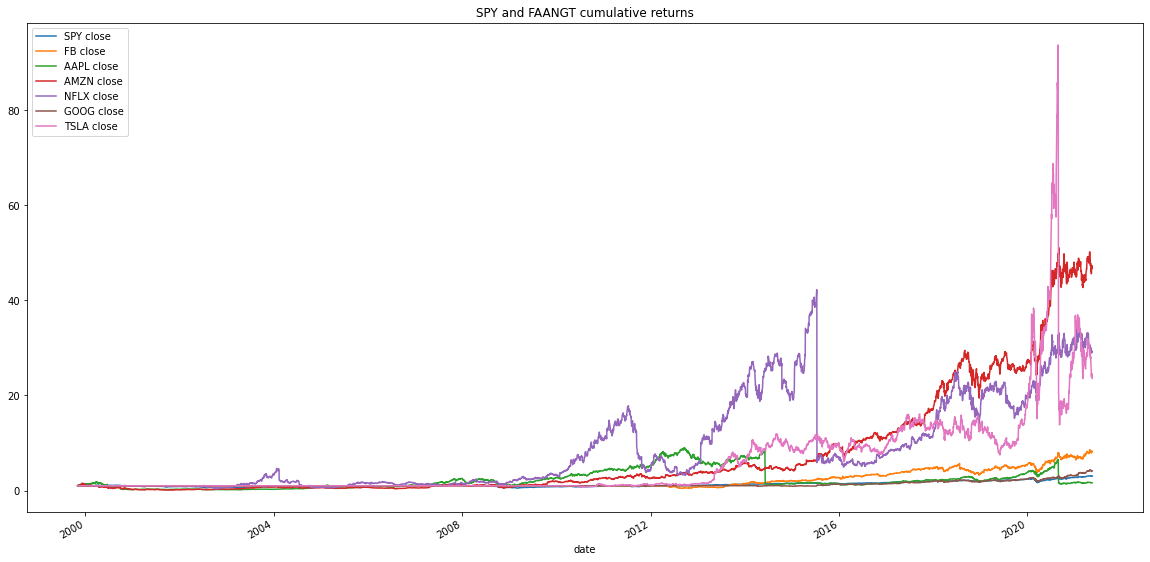

In [8]:
#Annualized PCT Change and compare 
SF_cum_returns = perf.get_cumulative_returns(SPY_FAANGT_close_df)
SF_cum_returns.plot(figsize=(20,10), title = 'SPY and FAANGT cumulative returns') #cumulative returns since 2014 (market cap data would have been better)
print(f'''Cumulative Returns of S&P 500 and FAANGT (2000 - present)
**************************************
{ SF_cum_returns.iloc[-1].sort_values()}''',) #gives best cumulative return todate

### Top 10 performing cryptos (by cumulative percentage returns) and top 10 market cap cryptos during user defined time period

Data saved in Results folder


 Top 10 performers during time period
paccoin prices        9919.717153
shiba-inu prices      9730.570874
sora prices           5226.328540
binancecoin prices    3239.574297
dogecoin prices       1529.639468
verge prices          1399.634546
groestlcoin prices     649.439228
thorchain prices       454.196831
neo prices             391.330684
feg-token prices       371.251211
Name: 2021-05-20 00:00:00, dtype: float64

**********************************************************

Top 10 market cap cryptos' performance during time period
binancecoin prices     3239.574297
dogecoin prices        1529.639468
ethereum prices         299.596844
ripple prices           172.096456
cardano prices           56.522607
bitcoin prices           36.585003
polkadot prices           8.699471
tether prices             0.994191
usd-coin prices           0.990504
bitcoin-cash prices       0.940975
Name: 2021-05-20 00:00:00, dtype: float64


<AxesSubplot:title={'center':"Top 10 market cap cryptos' performance during time period"}, xlabel='time', ylabel='Rate of Returns'>

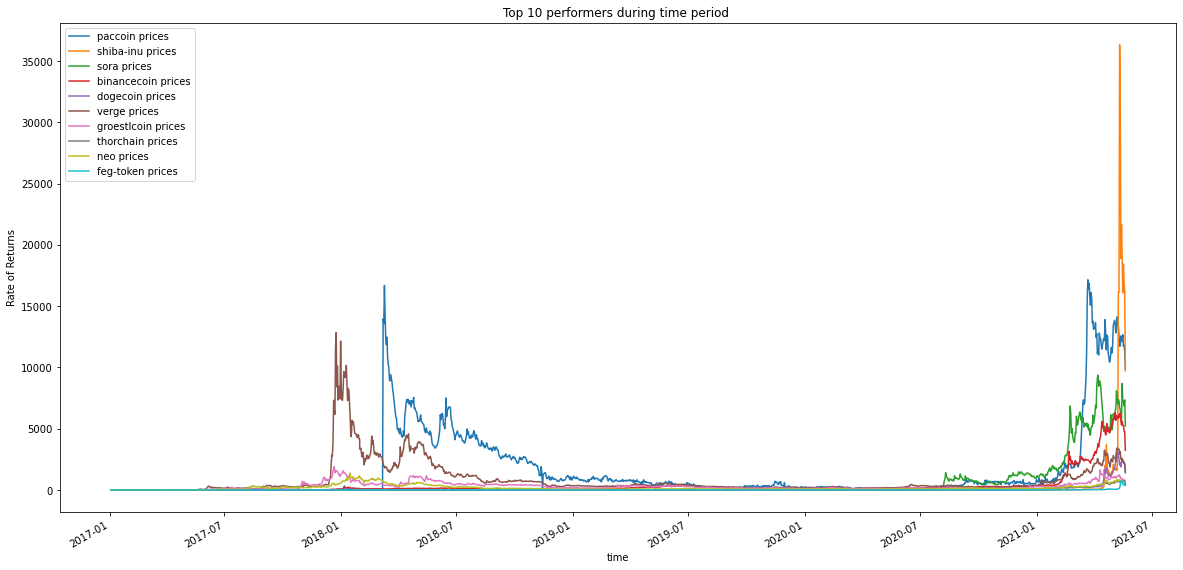

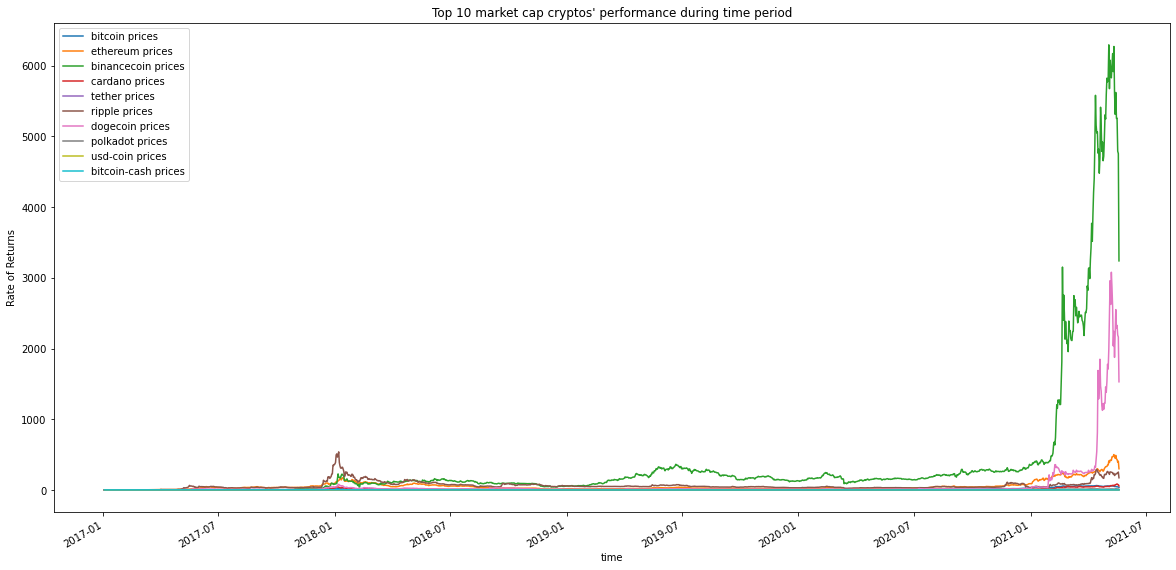

In [9]:
crypto_cum_returns = perf.get_cumulative_returns(crypto_price_df) 
top_10 = crypto_cum_returns.iloc[-1].sort_values(ascending=False).head(10) #sorting through just the latest date, decending order, and grabbing just top 10
top_10_list = top_10.index.tolist() #converting index to a list
top_10_market_cap = crypto_cum_returns.iloc[:, 0 : 10] #grab all rows, but only first 10 columns which are sorted by marketcap
top_10.to_csv('Results/top_10_returns_to_date.csv')
top_10_market_cap.to_csv('Results/top_market_cap_returns.csv')
print('''Data saved in Results folder

''')

#writing for loop to plot only the top 10
for crypto in top_10_list:
    crypto_cum_returns.loc[: , crypto].plot(legend=True, 
                                            figsize=(20, 10), 
                                            title='Top 10 performers during time period ', 
                                            ylabel='Rate of Returns')
    
print(f''' Top 10 performers during time period
{top_10}

**********************************************************

Top 10 market cap cryptos' performance during time period
{top_10_market_cap.iloc[-1].sort_values(ascending=False)}''') #print data to see returns

top_10_market_cap.plot(legend=True, figsize=(20, 10), 
                       title="Top 10 market cap cryptos' performance during time period", 
                       ylabel='Rate of Returns')


## Evaluating Risk-Return

### Sharpe Ratio of (top 10, middle 10, and low 10) of the 500 crypto coins. Version 2.0 will allow for user input here. Run cell below for top 10 during this time period.

Data saved in Results folder. Please see that file for all sharpe ratios values of this analysis


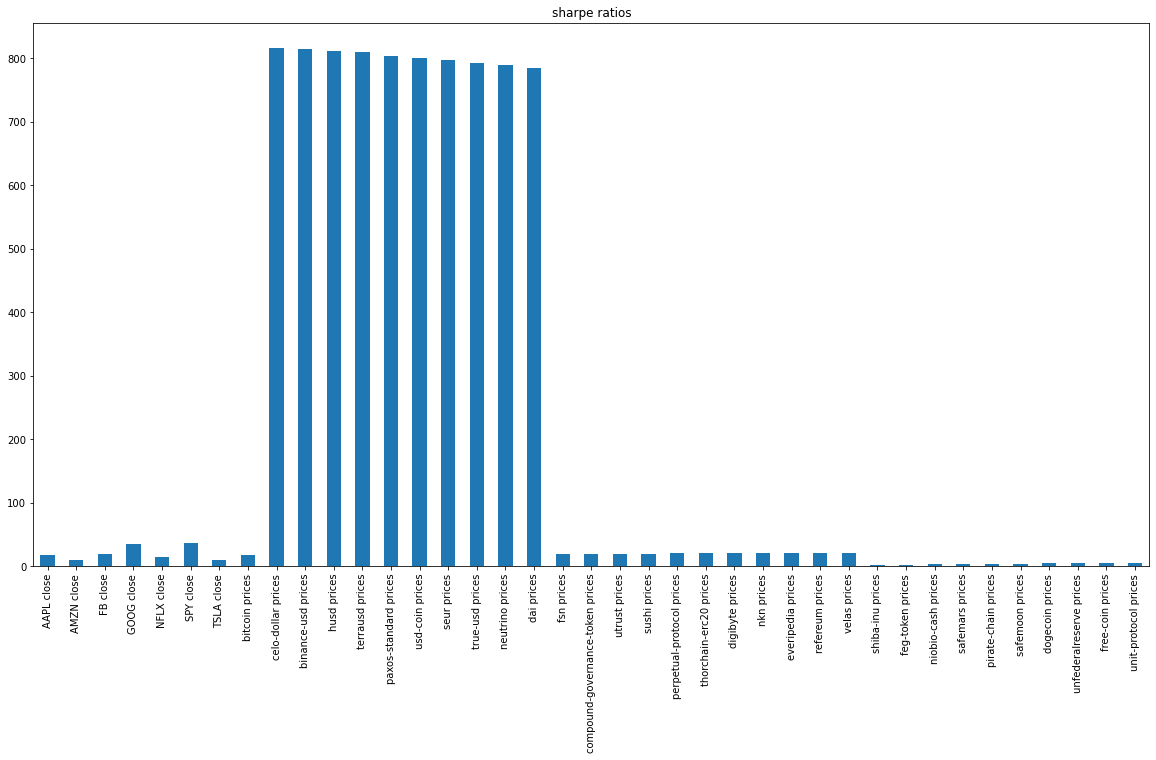

In [15]:
#Calculate Sharpe Ratio () SPY_FAANGT_close and crypto_close
# top_bottom_response = input('Do you want to see the top or bottom 10 sharpe ratios?')
crypto_sharpe = perf.get_sharpe_ratios(crypto_cum_returns, trading_days = 365)
SF_sharpe = perf.get_sharpe_ratios(SF_cum_returns)

top_10_sharpe = crypto_sharpe.sort_values(ascending=False).head(10) #sorting through just the latest date, decending order, and grabbing just top 10
bottom_10_sharpe = crypto_sharpe.sort_values().head(10)
middle_10_sharpe = crypto_sharpe.sort_values()[245:256]
btc_sharpe = crypto_sharpe[['bitcoin prices']]

#Bringing low/mid/high sharpe ratios together in one dataframe
sharpe_list = [SF_sharpe, btc_sharpe, top_10_sharpe, middle_10_sharpe, bottom_10_sharpe]
sharpe_df = pd.concat(sharpe_list, axis=0, join='outer')
sharpe_df.plot.bar(title='sharpe ratios', figsize= (20,10))


#Saving and Presenting Results   
sharpe_df.sort_values(ascending=True)
sharpe_df.to_csv('Results/top_10_low_mid_high_sharpe_to_date.csv')
print('''Data saved in Results folder. Please see that file for all sharpe ratios values of this plot''')



### Beta Analysis - Comming soon in next update!